<a href="https://colab.research.google.com/github/AlexGerwer/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [3]:
# Step 1 - find the actual file to download
# On github, navigate to the persons.csv data file and then click the "raw" button to display the file itself.
# Use the URL at the top of the page in read_csv()
persons_data_url = 'https://raw.githubusercontent.com/ryanleeallred/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
# The dataset is review in github:  https://github.com/ryanleeallred/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/persons.csv
# All of the data seems to be int64
# There does not seem to be any missing data
# There does not seem to be an apparent relationship between the data, although it would appear that weight would be the dependent variable
# Although there could be a relationship between weight and age, or weight and exercie time, one can envision many confounding variables, such as diet, the general state of health, etc.
# Step 2 - load the data
import pandas as pd
persons_data = pd.read_csv(persons_data_url)
print ('\n')
# Step 3 - inspect the loaded file
pd.set_option('display.max_columns', None)
print (persons_data.head(20), '\n')
# Step 4 - assess the loaded file for characteristics and missing (NaN) data
persons_data_shape = persons_data.shape
print ('Persons Data Shape')
print (persons_data_shape, '\n')
print (persons_data.count(), '\n')
print (persons_data.isna().sum(), '\n')



    Unnamed: 0  age  weight  exercise_time
0            0   44     118            192
1            1   41     161             35
2            2   46     128            220
3            3   39     216             57
4            4   28     116            182
5            5   58     103            165
6            6   55     161            107
7            7   21     188             37
8            8   55     216             79
9            9   50     127            267
10          10   21     160            228
11          11   43     102             78
12          12   73     209             44
13          13   27     165             48
14          14   21     169            171
15          15   36     131            194
16          16   49     171            191
17          17   69     172            147
18          18   18     122            271
19          19   55     157            111 

Persons Data Shape
(1200, 4) 

Unnamed: 0       1200
age              1200
weight           1

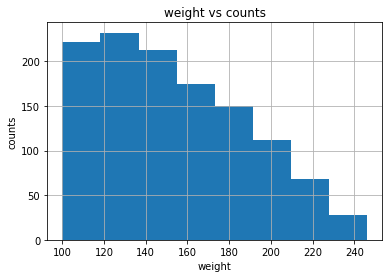

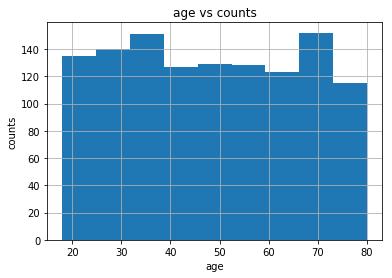

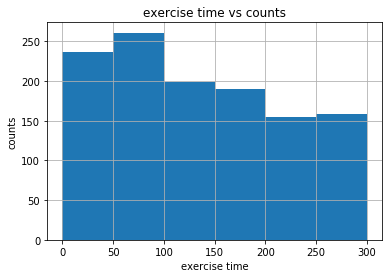

In [4]:
# Crosstabulation is used to further examine the data
# In order for the data to be viewed in a meaningful way, it will need to be binned
# Histograms are used to determine meaningful binning grannularity
import matplotlib.pyplot as plt
# Histogram for weight
persons_data['weight'].hist(bins=8)
plt.xlabel('weight')
plt.ylabel('counts')
plt.title('weight vs counts')
plt.grid(True)
plt.show();

# Histogram for age
persons_data['age'].hist(bins=9)
plt.xlabel('age')
plt.ylabel('counts')
plt.title('age vs counts')
plt.grid(True)
plt.show();

# Histogram for exercise time
persons_data['exercise_time'].hist(bins=6)
plt.xlabel('exercise time')
plt.ylabel('counts')
plt.title('exercise time vs counts')
plt.grid(True)
plt.show();


In [10]:
# !pip freeze


absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.1.0
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.199
botocore==1.12.199
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.6.16
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.13
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.0
distributed==1.25.3
Django==2.2.3
dlib==19.16.0
dm-sonnet==1.34
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easy

In [11]:
# !pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [2]:
# import pandas as pd
print(pd.__version__)

0.23.4


In [17]:
# Now we will print some crosstabulated data
weight_bins = pd.cut(persons_data['weight'], 8) # 8 equal-sized bins
age_bins = pd.cut(persons_data['age'], 9) # 9 equal-sized bins
exercise_time_bins = pd.cut(persons_data['exercise_time'], 6) # 6 equal-sized bins

crosstab_age = pd.crosstab(weight_bins, age_bins, normalize = 'columns')
print (crosstab_age)
print('\n')
crosstab_exercise_time = pd.crosstab(weight_bins, exercise_time_bins, normalize = 'columns')
print(crosstab_exercise_time)
print('\n')
crosstab_age_exercise = pd.crosstab(age_bins, exercise_time_bins, normalize = 'columns')
print(crosstab_age_exercise)
print('\n')

age               (17.938, 24.889]  (24.889, 31.778]  (31.778, 38.667]  \
weight                                                                   
(99.854, 118.25]          0.192593          0.235714          0.258278   
(118.25, 136.5]           0.170370          0.171429          0.198675   
(136.5, 154.75]           0.185185          0.228571          0.165563   
(154.75, 173.0]           0.207407          0.150000          0.119205   
(173.0, 191.25]           0.111111          0.078571          0.112583   
(191.25, 209.5]           0.096296          0.050000          0.092715   
(209.5, 227.75]           0.014815          0.064286          0.046358   
(227.75, 246.0]           0.022222          0.021429          0.006623   

age               (38.667, 45.556]  (45.556, 52.444]  (52.444, 59.333]  \
weight                                                                   
(99.854, 118.25]          0.204724          0.162791          0.210938   
(118.25, 136.5]           0.267717   

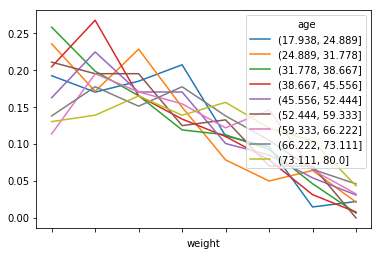

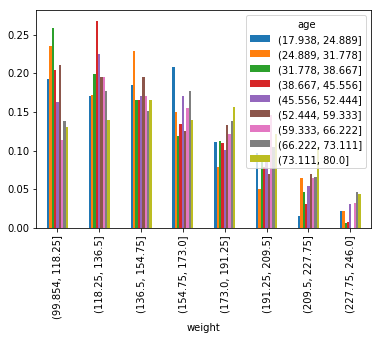

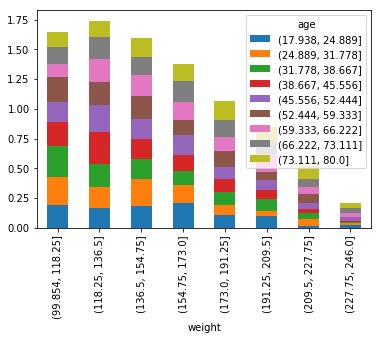

In [24]:
#  Now the cross tabs will be plotted
crosstab_age.plot();
crosstab_age.plot(kind = 'bar');
crosstab_age.plot(kind = 'bar', stacked = True);

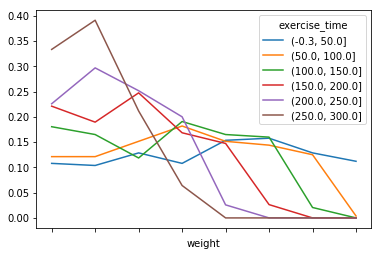

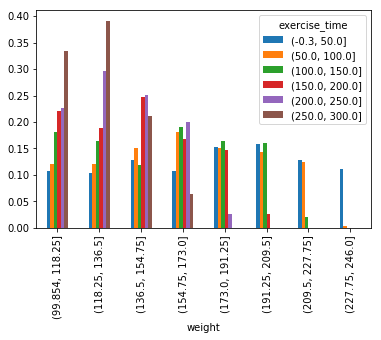

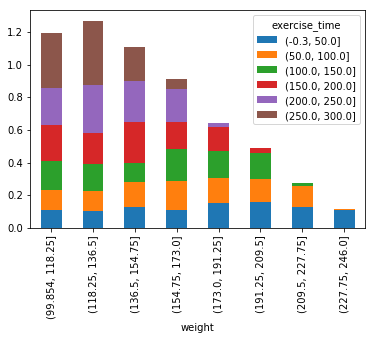

In [25]:
crosstab_exercise_time.plot();
crosstab_exercise_time.plot(kind = 'bar');
crosstab_exercise_time.plot(kind = 'bar', stacked = True);

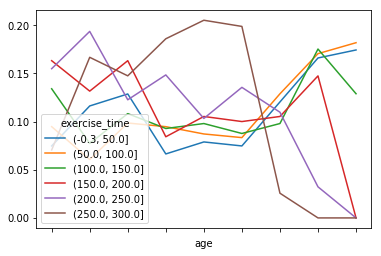

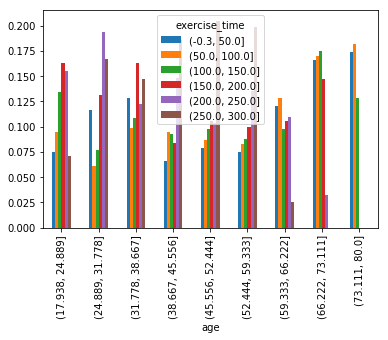

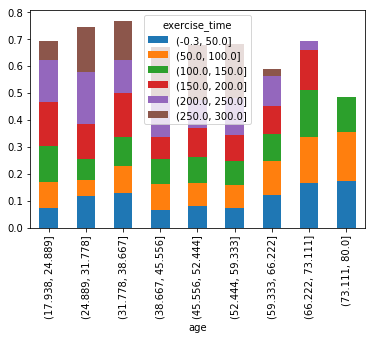

In [26]:
crosstab_age_exercise.plot();
crosstab_age_exercise.plot(kind = 'bar');
crosstab_age_exercise.plot(kind = 'bar', stacked = True);

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


In [0]:
#  All three variables in this data set are integers
#  There does not seem to be any relationship among the variables
#  This is not surprising because many factors determine such things as exercise time and weight
#  It seems like there was no control for confounding variables

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)